In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# load data
data = pd.read_csv('./UCI_Credit_Card.csv')
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [26]:
print(data.describe())

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802

In [27]:
next_month = data['default.payment.next.month'].value_counts()

In [28]:
print(next_month)

0    23364
1     6636
Name: default.payment.next.month, dtype: int64


In [29]:
df = pd.DataFrame({'default.payment.next.month': next_month.index,
                  'values': next_month.values})

<function matplotlib.pyplot.show(*args, **kw)>

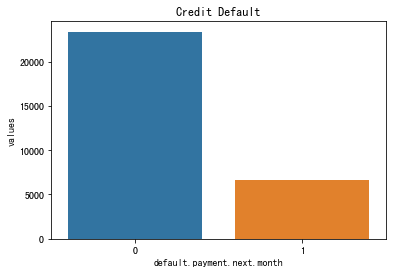

In [30]:
plt.title('Credit Default')
sns.barplot(x='default.payment.next.month', y='values', data=df)
plt.show

In [31]:
data.drop(['ID'], inplace=True, axis=1)
target = data['default.payment.next.month'].values
columns = data.columns.tolist()
print(columns)

['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']


In [32]:
columns.remove('default.payment.next.month')

In [33]:
features = data[columns].values

In [34]:
from sklearn.model_selection import train_test_split
# train test split
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.3)

In [35]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

classifiers = [
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier()
]

classifier_names = ['svc',
                    'decisiontreeclassifier',
                    'randomforestclassifier',
                    'kneighborsclassifier'
                   ]

classifier_param_grid = [
            {'svc__C':[1], 'svc__gamma':[0.01]},
            {'decisiontreeclassifier__max_depth':[6,9,11]},
            {'randomforestclassifier__n_estimators':[3,5,6]} ,
            {'kneighborsclassifier__n_neighbors':[4,6,8]},
]


In [59]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

def GridSearchCV_work(pipeline, train_x, train_y, test_x, text_y, model_param_grid, score='accuracy'):
    gridsearch = GridSearchCV(estimator=pipeline, param_grid=model_param_grid, scoring=score)
    
    search = gridsearch.fit(train_x, train_y)
    print('GridSearchCV best param: ', search.best_params_)
    print('GridSearchCV best score: ', search.best_score_)
    predict_y = gridsearch.predict(test_x)
    print('准确率 %0.4lf' %accuracy_score(test_y, predict_y))
    
    response = {}
    response['predict_y'] = predict_y
    response['accuracy_score'] = accuracy_score(test_y, predict_y)
    return response

for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    pipeline = Pipeline([
            ('scaler', StandardScaler()),
            (model_name, model)
    ])
    result = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid , score = 'accuracy')


GridSearchCV best param:  {'svc__C': 1, 'svc__gamma': 0.01}
GridSearchCV best score:  0.8163809523809524
准确率 0.8204
GridSearchCV best param:  {'decisiontreeclassifier__max_depth': 6}
GridSearchCV best score:  0.8167619047619048
准确率 0.8212
GridSearchCV best param:  {'randomforestclassifier__n_estimators': 6}
GridSearchCV best score:  0.8008095238095236
准确率 0.8008
GridSearchCV best param:  {'kneighborsclassifier__n_neighbors': 8}
GridSearchCV best score:  0.8025238095238094
准确率 0.8069


In [87]:
df = pd.read_csv('creditcard.csv')

In [74]:
print(df.shape)

(284807, 31)


In [75]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [64]:
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix"', cmap = plt.cm.Blues) :
    plt.figure()
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [66]:
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2, color = 'b')
    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('召回率')
    plt.ylabel('准确率')
    plt.title('准确率-召回率 曲线')
    plt.show();


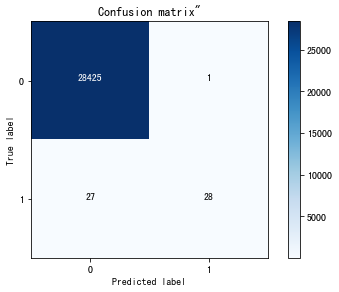

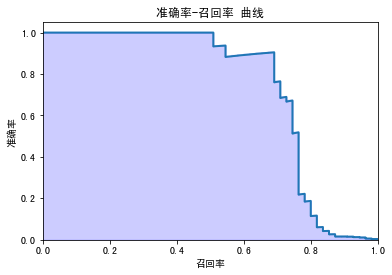

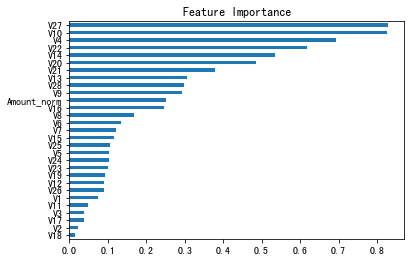

In [88]:
import numpy as np
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve

df['Amount_norm'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
y= np.array(df.Class.tolist())
df = df.drop(['Time', 'Class', 'Amount'], axis=1)
X = df


train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1)

clf = LogisticRegression()
clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)

cm = confusion_matrix(test_y, predict_y)
plot_confusion_matrix(cm, classes=[0,1], title = 'Confusion matrix"', cmap = plt.cm.Blues)


y_score = clf.decision_function(test_x)
precision, recall, thresholds = precision_recall_curve(test_y, y_score)
plot_precision_recall()

coeffs = clf.coef_
df_co = pd.DataFrame(np.transpose(abs(coeffs)), columns=["coef_"])
# 下标设置为Feature Name
df_co.index = df.columns
df_co.sort_values("coef_", ascending=True, inplace=True)
df_co.coef_.plot(kind="barh")
plt.title("Feature Importance")
plt.show()
